In [2]:
"""Created on July 2024
@author: mohammad-reza.nilchiyan
"""


import pandas as pd
#Iris dataset
path='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(path, header=None, sep=',')

In [3]:

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

df.dropna(how="all", inplace=True) 
#The df.dropna(how="all", inplace=True) 
#function is designed to drop rows (by default) where all elements are NaN. 

### Structure of the Iris Dataset


The Iris dataset contains information about three different species of iris flowers (Setosa, Versicolor, and Virginica). 

Each row in the dataset corresponds to one flower sample and includes the following features:


   #### Sepal length in cm (continuous variable)

   #### Sepal width in cm (continuous variable)

   #### Petal length in cm (continuous variable)

   #### Petal width in cm (continuous variable)

   #### Class label (categorical variable):
         Iris-setosa
         Iris-versicolor
         Iris-virginica

In [4]:
print(df.head(10))

   sepal_len  sepal_wid  petal_len  petal_wid        class
0        5.1        3.5        1.4        0.2  Iris-setosa
1        4.9        3.0        1.4        0.2  Iris-setosa
2        4.7        3.2        1.3        0.2  Iris-setosa
3        4.6        3.1        1.5        0.2  Iris-setosa
4        5.0        3.6        1.4        0.2  Iris-setosa
5        5.4        3.9        1.7        0.4  Iris-setosa
6        4.6        3.4        1.4        0.3  Iris-setosa
7        5.0        3.4        1.5        0.2  Iris-setosa
8        4.4        2.9        1.4        0.2  Iris-setosa
9        4.9        3.1        1.5        0.1  Iris-setosa


In [5]:
df.shape

(150, 5)

In [6]:
X = df.iloc[:, 0:4].values  # Features (columns 0 to 4)


In [7]:
print(X[:10])


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [8]:
y = df.iloc[:, 4].values    # Labels (column 4)

In [9]:
print(y[:10])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [10]:
print(X.shape)

(150, 4)


In [11]:
print(y.shape)

(150,)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#sklearn.decomposition is a module in the scikit-learn library 
#that provides various algorithms for dimensionality reduction.

from sklearn.decomposition import PCA

Linear Discriminant Analysis (LDA) is also a dimensionality reduction technique, but it is part of the sklearn.discriminant_analysis

In [13]:
# Set the size of the plot
plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

## plotting 
To create histograms for each feature (sepal_len, sepal_wid, petal_len, petal_wid) and study them separately for each species in the dataset, you need to loop through each feature and plot histograms for each species. 

/Users/mohammad-reza.nilchiyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


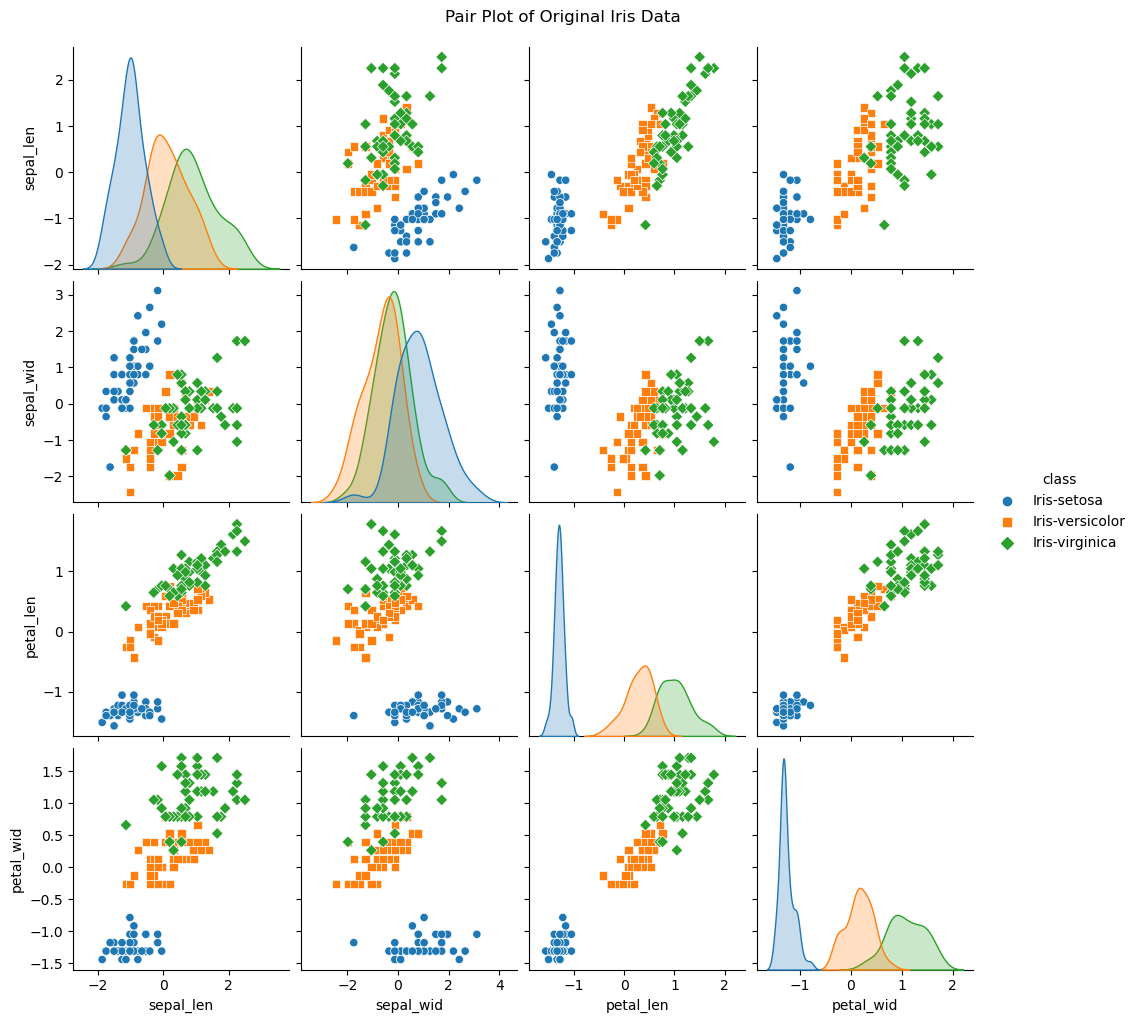

In [27]:
import seaborn as sns

# Create a DataFrame with the features and class
df_features = pd.DataFrame(X, columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid'])
df_features['class'] = y

# Pair plot of the original features
sns.pairplot(df_features, hue='class', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Original Iris Data', y=1.02)
plt.show()

 These plots visualize the original Iris dataset using pair plots and then will apply PCA to reduce the dimensionality to 2D, visualizing the result with a scatter plot of the principal components. The PCA plot shows how the dimensionality reduction captures the structure of the data, making it easier to see the separability of different species.

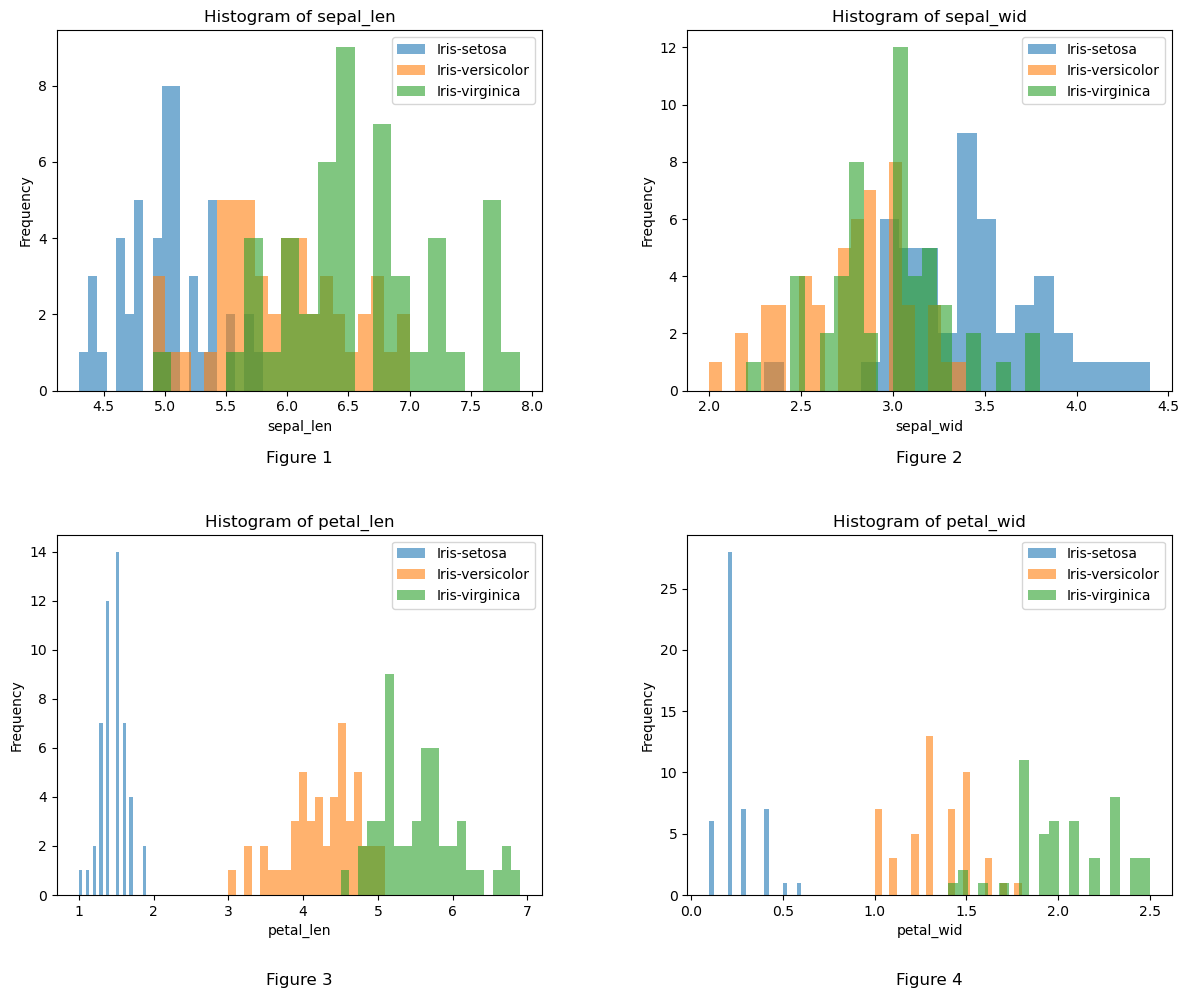

In [14]:
# Features to plot
features = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten axes array for easy iteration
# in the context of creating multiple subplots in Matplotlib.
#The flatten() method is used to convert this multi-dimensional array into a one-dimensional array. 
#This makes it easier to iterate over and manipulate the individual axes objects.

axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(features):
    #enumerate object can then be used in a loop to retrieve both the index and the corresponding item 
    #from the iterable at the same time.
    
    for species in df['class'].unique():
        #The unique() function returns an array of unique values present in that column,
        #which in this case are the species names: "Iris-setosa," "Iris-versicolor," and "Iris-virginica.

        subset = df[df['class'] == species]
        #subset = df[df['class'].isin(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])]
        
        axes[i].hist(subset[feature], bins=20, alpha=0.6, label=species)
        
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

    # Add figure number below each subplot
    fig.text(0.5, -0.2 - (i // 2) * 0.05, f"Figure {i+1}", ha="center", fontsize=12, transform=axes[i].transAxes)

# Adjust layout to make space for the figure texts and between subplots
plt.tight_layout()
plt.subplots_adjust(bottom=0.1, wspace=0.3, hspace=0.4)  # Adjust bottom, width, and height spacing

# Display the plot
plt.show()

### Distribution Patterns:

 <span style="color: blue;">Iris-setosa</span>: The sepal lengths of Iris-setosa primarily cluster around 5 to 6 cm. The highest frequency of sepal lengths is around 5.0 to 5.5 cm.
 
 <span style="color:orange;">Iris-versicolor</span>: The sepal lengths of Iris-versicolor are more spread out compared to Iris-setosa, with a noticeable peak around 6 cm.
 
<span style="color:green;">Iris-virginica</span>: The sepal lengths of Iris-virginica show a wider range, generally longer than those of Iris-setosa and Iris-versicolor, with a peak frequency around 6.5 to 7 cm.

# Interpret the Histograms

### Analyze the Distribution:
Look at the shape of the histograms to understand the distribution of each feature. Are they normally distributed, skewed, or do they have multiple peaks?
    
### Compare Species:
Compare the distributions of features across different species. Are there noticeable differences in the sepal and petal measurements between species?

<span style="color: blue;">Calculate summary statistics (<b>mean, median, standard deviation</b>) for each feature, both overall and for each species.
    
    This may give the data greater quantitative insights.

In [18]:
# Calculate summary statistics
summary_stats = df.groupby('class').describe()
print(summary_stats)

#The `groupby` method splits the data into groups based on the values in one or more columns. 
#It then allows for various operations to be performed on each group independently. 
#These operations can include aggregation (e.g., sum, mean), transformation, filtering, and more.
grouped = df.groupby('class')

agg_values = grouped.agg(['mean', 'std', 'max'])

                sepal_len                                              \
                    count   mean       std  min    25%  50%  75%  max   
class                                                                   
Iris-setosa          50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor      50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica       50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_wid         ... petal_len      petal_wid         \
                    count   mean  ...       75%  max     count   mean   
class                             ...                                   
Iris-setosa          50.0  3.418  ...     1.575  1.9      50.0  0.244   
Iris-versicolor      50.0  2.770  ...     4.600  5.1      50.0  1.326   
Iris-virginica       50.0  2.974  ...     5.875  6.9      50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
class           

In [19]:
print(agg_values)

                sepal_len                sepal_wid                petal_len  \
                     mean       std  max      mean       std  max      mean   
class                                                                         
Iris-setosa         5.006  0.352490  5.8     3.418  0.381024  4.4     1.464   
Iris-versicolor     5.936  0.516171  7.0     2.770  0.313798  3.4     4.260   
Iris-virginica      6.588  0.635880  7.9     2.974  0.322497  3.8     5.552   

                               petal_wid                 
                      std  max      mean       std  max  
class                                                    
Iris-setosa      0.173511  1.9     0.244  0.107210  0.6  
Iris-versicolor  0.469911  5.1     1.326  0.197753  1.8  
Iris-virginica   0.551895  6.9     2.026  0.274650  2.5  


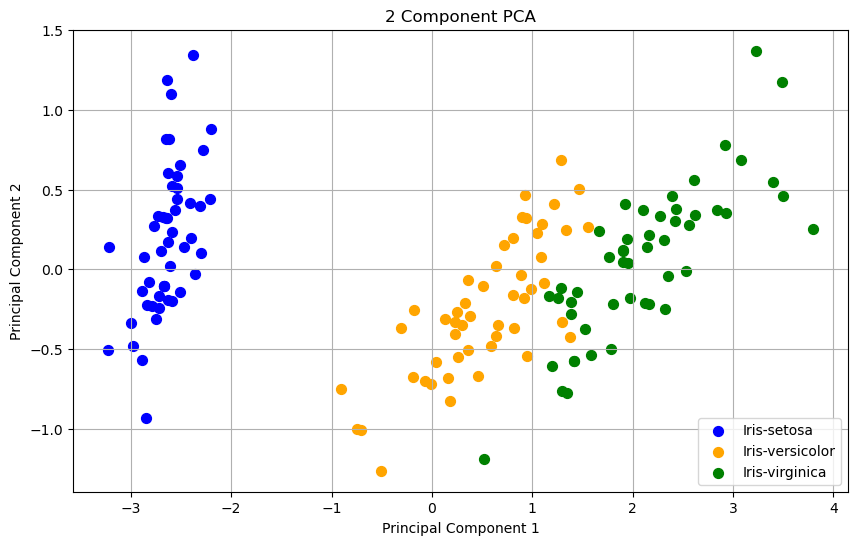

In [25]:
# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal_component_1', 'principal_component_2'])

# Combine with the target variable
finalDf = pd.concat([principalDf, df[['class']]], axis=1)

# Visualize PCA results
plt.figure(figsize=(10, 6))
targets = df['class'].unique()
colors = ['b', 'orange', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['class'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'principal_component_1'],
                finalDf.loc[indicesToKeep, 'principal_component_2'],
                c=color,
                s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')
plt.legend(targets)
plt.grid()
plt.show()

<span style="color: red;"><b>Cluster Separation:</b> ## The clusters in the PCA plot show that the species are separable in the reduced 2D space. Iris-setosa forms a distinct cluster, while Iris-versicolor and Iris-virginica are somewhat overlapping but still separable.
    
<span style="color: red;"> <b>Variance Capture:</b> ## The first two principal components capture the most significant variance in the data, thus providing a good representation of the original data in reduced dimensions.